# BoomBikes Assignment

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


warnings.filterwarnings('ignore')

## Reading the data

### Loading the csv file

In [2]:
# Reading the day.csv file
data = pd.read_csv(r'day.csv', low_memory=False)

# Checking the first 5 rows of data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the dataframe info for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As we can see from the table above, there seems to be no null or missing values.

In [4]:
# Checking the statistical information of the numerical features in the data
data[['atemp', 'hum', 'windspeed', 'cnt']].describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


## Data Understanding and Cleaning

### Dropping features

The features '___instant___', '___dteday___', '___casual___' and '___registered___' can be dropped as these features are either redundant or unnecessary. Also, there are two temperature features out of which one can be dropped as both are conveying more or less the same information. For this case, I am keeping the '___atemp___' feature since it is the feeling temperature which factors in the relative humidity as well to estimate how hot it actually feels to a human being.

In [5]:
# Dropping the redundant or unnecessary features
data.drop(['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1, inplace=True)

# Display the first 5 rows affter dropping the columns
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### Distribution plot of target varibale

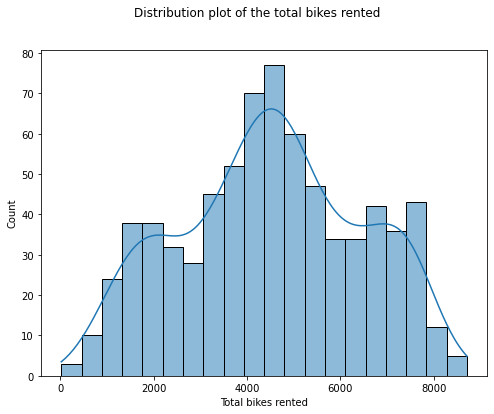

In [6]:
# Checking the distribution of the target
figure = plt.figure(figsize=(8, 6))
sns.histplot(data['cnt'], bins=20, kde=True)
figure.suptitle('Distribution plot of the total bikes rented', fontsize=12)

plt.xlabel('Total bikes rented')
plt.show()

As we can see, the distribution of the total bikes rented roughly follows a normal distribution

### Pairwise scatterplots to see the relationship amongst features and with the target

<Figure size 1440x1440 with 0 Axes>

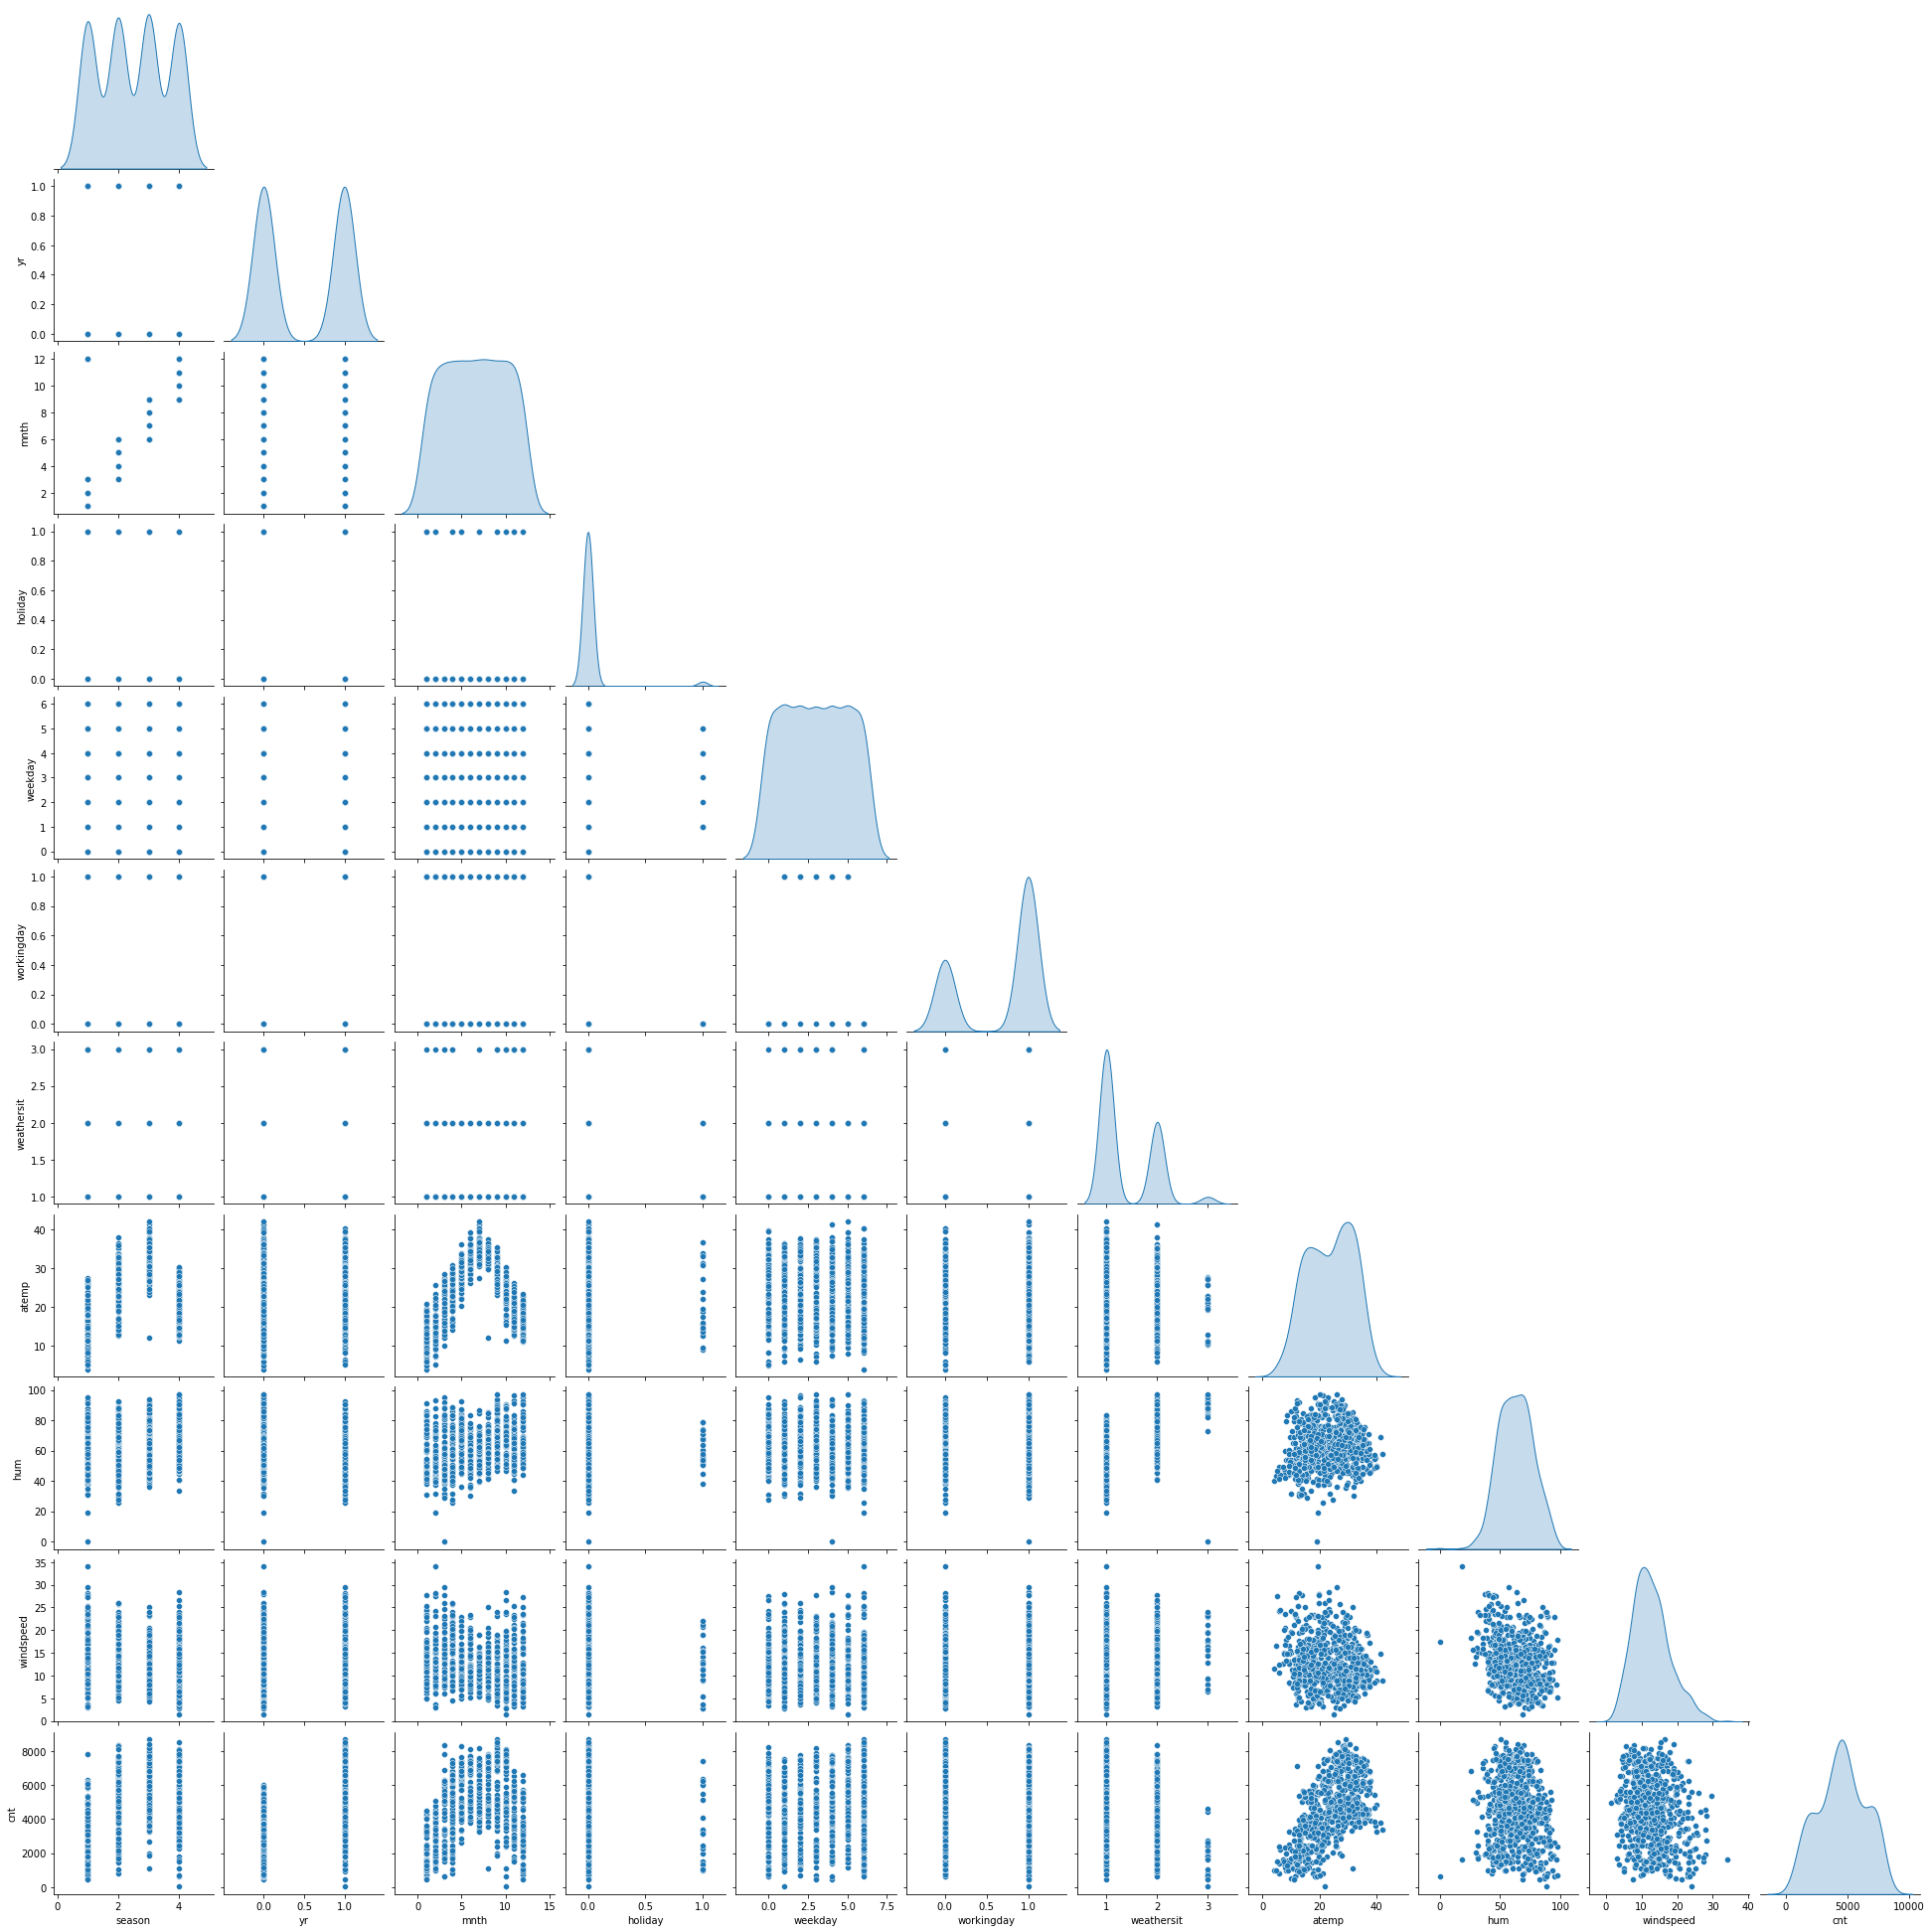

In [7]:
# Plotting pairplots of the dataframe
figure = plt.figure(figsize=(20, 20))
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

From the pairplots, we can see that the feeling ___temperature (atemp)___, ___humidity (hum)___ and ___windspeed (windspeed)___ have a somewhat linear relationship with the ___total bikes rented (cnt)___. Also, the total bikes rented increased from the year ___2018___ to ___2019___. The likelihood of bikes being rented was more on days which were not holidays and when the weather was clear or partly cloudy.

### Boxplots to visualize the different features

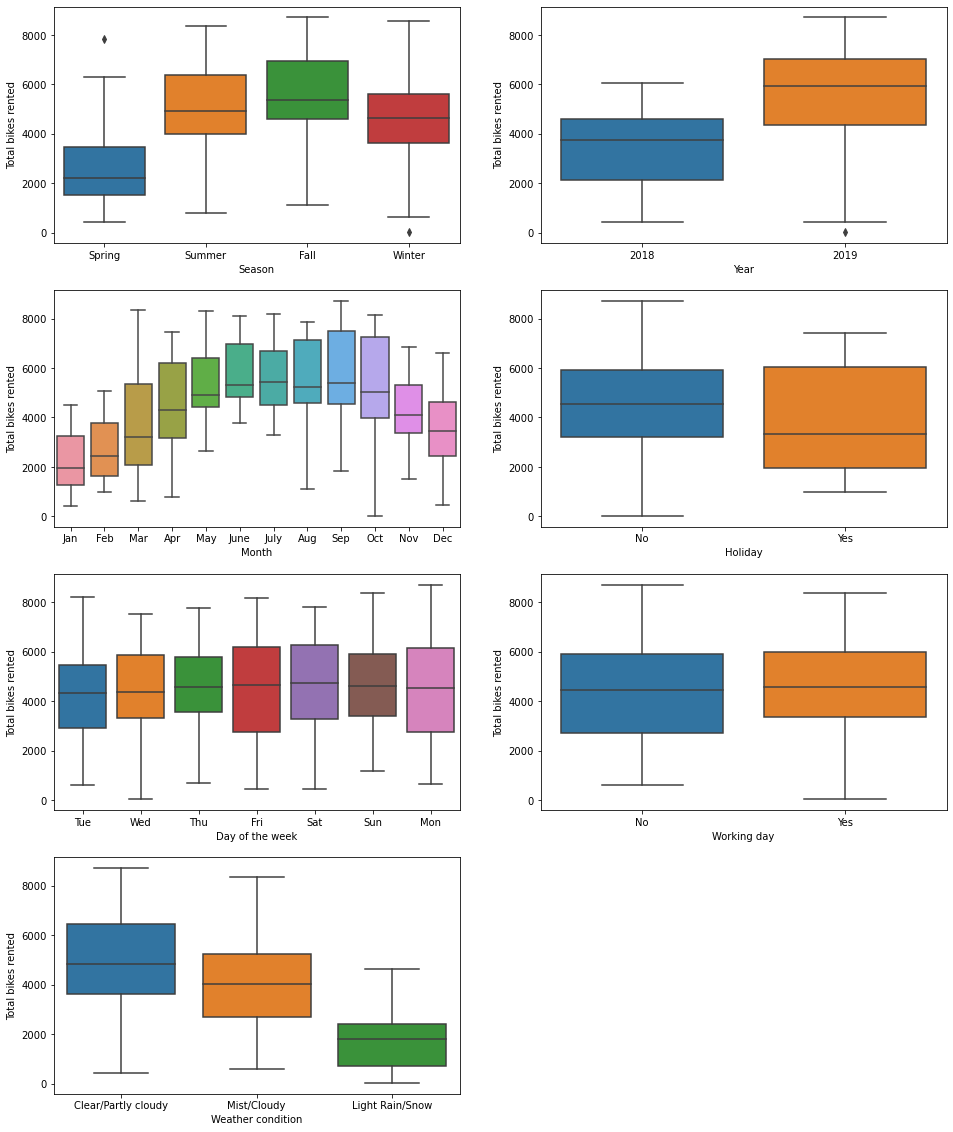

In [8]:
figure = plt.figure(figsize=(16, 20))

# boxplot for the total bikes rented during each season
plt.subplot(4, 2, 1)
sns.boxplot(data=data, x='season', y='cnt')
plt.xlabel('Season')
plt.ylabel('Total bikes rented')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])

# boxplot for the total bikes rented during each year
plt.subplot(4, 2, 2)
sns.boxplot(data=data, x='yr', y='cnt')
plt.xlabel('Year')
plt.ylabel('Total bikes rented')
plt.xticks(ticks=[0, 1], labels=['2018', '2019'])

# boxplot for the total bikes rented during each month
plt.subplot(4, 2, 3)
sns.boxplot(data=data, x='mnth', y='cnt')
plt.xlabel('Month')
plt.ylabel('Total bikes rented')

tm = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
lm = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=tm, labels=lm)

# boxplot for the total bikes rented during holidays
plt.subplot(4, 2, 4)
sns.boxplot(data=data, x='holiday', y='cnt')
plt.xlabel('Holiday')
plt.ylabel('Total bikes rented')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# boxplot for the total bikes rented during each day of the week
plt.subplot(4, 2, 5)
sns.boxplot(data=data, x='weekday', y='cnt')
plt.xlabel('Day of the week')
plt.ylabel('Total bikes rented')

tdw = [0, 1, 2, 3, 4, 5, 6]
tdl = ['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon']
plt.xticks(ticks=tdw, labels=tdl)

# boxplot for the total bikes rented during working days
plt.subplot(4, 2, 6)
sns.boxplot(data=data, x='workingday', y='cnt')
plt.xlabel('Working day')
plt.ylabel('Total bikes rented')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# boxplot for the total bikes rented across different weather conditions
plt.subplot(4, 2, 7)
sns.boxplot(data=data, x='weathersit', y='cnt')
plt.xlabel('Weather condition')
plt.ylabel('Total bikes rented')
plt.xticks(ticks=[0, 1, 2], labels=['Clear/Partly cloudy', 'Mist/Cloudy', 'Light Rain/Snow'])

plt.show()

The boxplots reveal the following information:
- The total bikes rented increased as we went from 2018 to 2019. This could be because of more advertisement, more popularity about the service and, the service being accessible in a greater number of areas and, an increase in the inventory.
- The demand of the bike rental is way more on a clear or a partly cloudy day than a rainy day, or when there is snowfall.
- The demand for the shared bikes has a positive correlation with the feature atemp.
- The median of the demand for rental bikes is lower on holidays than other days.
- The demand was the highest during the summer and the fall seasons and the lowest during spring.
- The demand was much higher during the summer and fall months (April-Oct) than the other months i.e., during the summer and fall seasons as observed earlier.


### Regression plots for the features to further confirm linear relationship with target

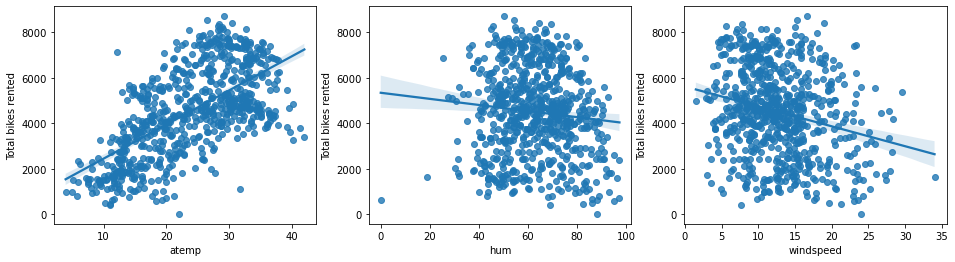

In [9]:
# Plotting regression plots of atemp, hum and windspeed with cnt
figure = plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.regplot(x='atemp', y='cnt', data=data)
plt.ylabel('Total bikes rented')

plt.subplot(1, 3, 2)
sns.regplot(x='hum', y='cnt', data=data)
plt.ylabel('Total bikes rented')

plt.subplot(1, 3, 3)
sns.regplot(x='windspeed', y='cnt', data=data)
plt.ylabel('Total bikes rented')

plt.show()

As we can see, there is clearly some linear relationship between these features and the target

### Clustermap of the features

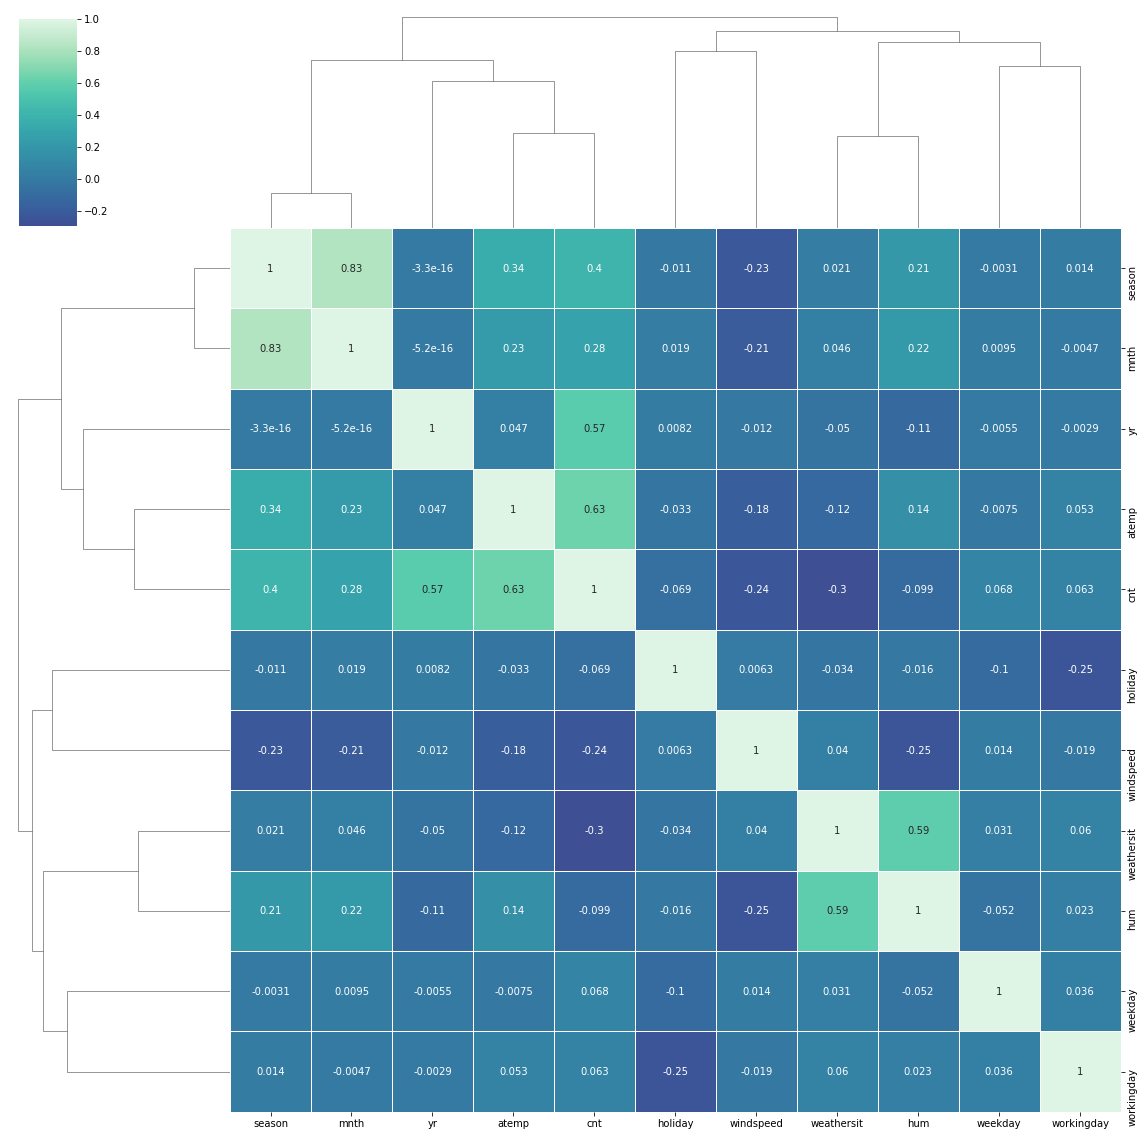

In [10]:
# Clustermap of the features
sns.clustermap(data.corr(), center=0, cmap='mako', linewidths=0.75, figsize=(16, 16), annot=True)
figure.suptitle('Clustermap of the features', fontsize=16)
plt.show()

As can be seen, some of the features are correlated to a large extent.

### Conversion to categorical

The features '___weekday___', '___mnth___', '___season___' and '___weathersit___' should be logically categorical and need to be encoded to make more sense of these features. So, we need to first check the unique values that these features hold.

In [11]:
# Checking the unique values of the weekday feature
data['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [12]:
# Checking the unique values of the season feature
data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
# Checking the unique values of the mnth feature
data['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
# Checking the unique values of the weathersit feature
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
# Mapping these features to categorical to make it easier to interpret the data (As per data dictionary and dates)

weekday_map = {0: 'Tues', 1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'}
mnth_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear_Partly_Cloudy', 2: 'Mist_Cloudy', 3: 'Light_Rain_Snow'}

data['weekday'] = data['weekday'].map(weekday_map)
data['mnth'] = data['mnth'].map(mnth_map)
data['season'] = data['season'].map(season_map)
data['weathersit'] = data['weathersit'].map(weather_map)

In [16]:
# Checking the data after converting the features to categorical
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear_Partly_Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear_Partly_Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear_Partly_Cloudy,11.46350,43.6957,12.522300,1600


## Dummy Variables

In [17]:
# Get the dummy variables for the features 'weekday', 'mnth', 'season' and 'weathersit'
# Setting the drop_first to True because we need only n-1 variables for n categories
data = pd.get_dummies(data, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

# Check what the dataset after the dummy encoding looks like
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Checking all the columns
data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light_Rain_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

## Relationship of features with target variable

### Heatmap of features with the target variable

Plotting a heatmap of the new dataframe (having the newly created dummy variables)

In [19]:
# Calculating the correlation matrix of the input features with the target variable 'cnt'
correlation = data.drop('cnt', axis=1).corrwith(data['cnt'])
correlation = pd.DataFrame(correlation, columns=['cnt'])
print(correlation)

                                 cnt
yr                          0.569728
holiday                    -0.068764
workingday                  0.062542
atemp                       0.630685
hum                        -0.098543
windspeed                  -0.235132
season_Spring              -0.561702
season_Summer               0.145325
season_Winter               0.064619
mnth_Aug                    0.182100
mnth_Dec                   -0.173878
mnth_Feb                   -0.273848
mnth_Jan                   -0.367167
mnth_Jul                    0.166236
mnth_Jun                    0.195568
mnth_Mar                   -0.128456
mnth_May                    0.132553
mnth_Nov                   -0.040344
mnth_Oct                    0.108846
mnth_Sep                    0.194664
weekday_Mon                 0.009012
weekday_Sat                 0.033551
weekday_Sun                 0.038403
weekday_Thur                0.000560
weekday_Tues               -0.059146
weekday_Wed                -0.035991
w

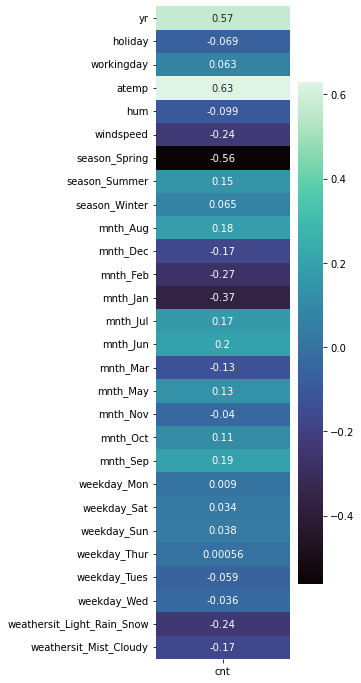

In [20]:
# Plotting the heatmap of the correlation matrix
figure = plt.figure(figsize=(3, 12))
sns.heatmap(correlation, annot=True, cmap='mako')
plt.show()

As we can see that there are certain features with a moderately strong correlation with the target variable. We have also seen that there is a linear relationship between some of the features and the target variable. Hence, a linear regression model may be used to model the relationship between the input features and the target variable

## Data pre-processing

### Train-Test split

We need to split the data into the train and test sets for model training and evaluation.

In [21]:
# Splitting the X and y into train and test sets
train_data, test_data = train_test_split(data, train_size=0.75, test_size=0.25, random_state=24)

### Scaling the features

Scaling the features should almost always be done as it has two main advantages:
- Helps the model converge faster on the minima
- Having the features in the same scale helps in interpreting the weights or coefficients properly

For our case, we will use min-max normalization because it is scaling technique which does not assume the data to have any specific distribution

In [22]:
# Instantiating a scaler object
scaler = MinMaxScaler()

# Apply the scaler to all the columns except the ones which have only 0s or 1s
scale_vars = ['atemp', 'hum', 'windspeed', 'cnt']

train_data[scale_vars] = scaler.fit_transform(train_data[scale_vars])
test_data[scale_vars] = scaler.transform(test_data[scale_vars])

### Separating the input and output features

In [23]:
# Separating the input features from the target feature for train and test sets
X_train = train_data.drop('cnt', axis=1)
y_train = train_data['cnt']

X_test = test_data.drop('cnt', axis=1)
y_test = test_data['cnt']

In [24]:
# Checking the first 5 rows of X_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1,0,1,0.915318,0.518321,0.230770,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
386,1,0,0,0.116213,0.775358,0.331996,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
268,0,0,1,0.712491,0.841741,0.138993,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
612,1,0,1,0.880063,0.705257,0.306324,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
179,0,0,1,0.804207,0.395114,0.466938,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Checking the first 5 rows of y_train
y_train.head()

572    0.806516
386    0.229111
268    0.540021
612    0.830892
179    0.609750
Name: cnt, dtype: float64

## Building the model

Let us first use all the features available and check the performance of the model

In [26]:
# Adding a constant because statsmodels doesn't automatically add a constant term
X_train_sm = sm.add_constant(X_train)

lr_sm = sm.OLS(y_train, X_train_sm).fit()

# Printing the beta-coefficients
print(lr_sm.params)

const                         0.253437
yr                            0.241643
holiday                       0.022990
workingday                    0.090427
atemp                         0.387171
hum                          -0.105640
windspeed                    -0.144383
season_Spring                -0.088335
season_Summer                 0.023831
season_Winter                 0.070410
mnth_Aug                      0.027519
mnth_Dec                     -0.059013
mnth_Feb                     -0.044604
mnth_Jan                     -0.077375
mnth_Jul                     -0.003844
mnth_Jun                      0.013360
mnth_Mar                      0.007118
mnth_May                      0.015971
mnth_Nov                     -0.055735
mnth_Oct                      0.025152
mnth_Sep                      0.066124
weekday_Mon                   0.099879
weekday_Sat                  -0.007234
weekday_Sun                   0.004767
weekday_Thur                 -0.004371
weekday_Tues             

In [27]:
# Printing the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.95e-203
Time:                        22:31:05   Log-Likelihood:                 575.26
No. Observations:                 547   AIC:                            -1095.
Df Residuals:                     519   BIC:                            -974.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [28]:
# Selecting the best features without the constant to calculate VIFs
best_features = X_train_sm.drop('const', axis=1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features    VIF
2                   workingday  77.18
24                weekday_Tues  16.44
20                 weekday_Mon  14.36
6                season_Spring  10.14
8                season_Winter   7.83
7                season_Summer   7.02
17                    mnth_Nov   6.54
3                        atemp   6.25
12                    mnth_Jan   6.18
18                    mnth_Oct   5.98
13                    mnth_Jul   5.36
10                    mnth_Dec   5.17
11                    mnth_Feb   5.17
9                     mnth_Aug   4.98
19                    mnth_Sep   4.83
1                      holiday   4.50
15                    mnth_Mar   3.27
14                    mnth_Jun   3.05
4                          hum   2.37
16                    mnth_May   2.33
25                 weekday_Wed   1.83
22                 weekday_Sun   1.75
23                weekday_Thur   1.70
21                 weekday_Sat   1.69
27      weathersit_Mist_Cloudy   1.68
26  weathers

As we can see that using all the features, gives us an R-squared value of 0.862 and an adjusted R-squared value of 0.854 which is very good. However, looking into the summary and the VIFs reveals that a lot of features are not statistically significant and have high VIFs, and hence, can be dropped to reduce the model complexity and improve its performance.

### Automatic feature selection using RFE

To reduce the number of features in the final model, we will use an automatic feature selection/elimination technique called Recursive Feature Elimination which is used to select a specific number of top features and only these features are used for model building.

In [29]:
# Checking the number of features
X_train.shape

(547, 28)

We have a total of 28 input features. Let us eliminate 10 features and build a model using 18 best features and then see the results.

In [30]:
# Instantiating a linear regression object
lr = LinearRegression()

# Fitting the model to the train data
lr.fit(X_train, y_train)

# Instantiating an RFE object with 18 best features specified
rfe = RFE(lr, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [31]:
# checking the ranking of the features to find the 18 best features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 10),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 8),
 ('weekday_Sun', False, 11),
 ('weekday_Thur', False, 9),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Light_Rain_Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [32]:
# Taking only the best 18 features
req_cols = X_train.columns[rfe.support_]
req_cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weekday_Tues', 'weekday_Wed',
       'weathersit_Light_Rain_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

Now building a model with the 18 best features using statsmodels to check the detailed summary

In [33]:
# Taking the train data for only the best 18 features
X_train_rfe = X_train[req_cols]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tues,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1,0,1,0.915318,0.518321,0.230770,0,0,0,0,0,0,0,0,0,0,0,0
386,1,0,0,0.116213,0.775358,0.331996,1,0,0,0,1,0,0,0,1,0,0,1
268,0,0,1,0.712491,0.841741,0.138993,0,1,0,0,0,0,1,0,0,1,0,1
612,1,0,1,0.880063,0.705257,0.306324,0,0,0,0,0,0,1,0,0,0,0,0
179,0,0,1,0.804207,0.395114,0.466938,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Adding the constant term
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lr = sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.36e-212
Time:                        22:31:05   Log-Likelihood:                 571.32
No. Observations:                 547   AIC:                            -1107.
Df Residuals:                     529   BIC:                            -1029.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping 10 input fetures had very little effect on the R-squared and adjusted R-squared values, thus, proving that those features were not significant to the prediction. We can further reduce the number of features. For the next step, let us manually eliminate features using a technique called Backward Elimination. 

### Manual elimination of features (Backward Elimination)

In backward elimination, we manually eliminate the one feature at each step and then build the model again to check the model performance. To do this the p-values and the VIFs of the features are considered. The decision of which feature to remove first based on these values is in the order given below:
- High p-value, high VIF
- High p-value, low VIF
- Low p-value, High VIF

In [36]:
# Selecting the best features without the constant to calculate VIFs
best_features = X_train_rfe.drop('const', axis=1)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features    VIF
2                   workingday  35.43
14                weekday_Tues   8.39
13                 weekday_Mon   7.32
6                season_Spring   3.96
3                        atemp   3.29
1                      holiday   2.76
10                    mnth_Jan   2.41
7                season_Winter   2.25
4                          hum   2.16
9                     mnth_Feb   2.12
11                    mnth_Nov   1.77
17      weathersit_Mist_Cloudy   1.66
8                     mnth_Dec   1.57
16  weathersit_Light_Rain_Snow   1.39
5                    windspeed   1.20
15                 weekday_Wed   1.20
12                    mnth_Sep   1.12
0                           yr   1.04


As we can see, one of the features has a high p-value and some of the features have high VIFs which cannot be ignored. Let us first consider removing the feature with the high p-value - holiday.

In [37]:
# Dropping the feature holiday
X_train_rfe.drop('holiday', axis=1, inplace=True)
X_train_rfe.head()

,const,yr,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tues,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1.0,1,1,0.915318,0.518321,0.230770,0,0,0,0,0,0,0,0,0,0,0,0
386,1.0,1,0,0.116213,0.775358,0.331996,1,0,0,0,1,0,0,0,1,0,0,1
268,1.0,0,1,0.712491,0.841741,0.138993,0,1,0,0,0,0,1,0,0,1,0,1
612,1.0,1,1,0.880063,0.705257,0.306324,0,0,0,0,0,0,1,0,0,0,0,0
179,1.0,0,1,0.804207,0.395114,0.466938,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Let us check the model performance now
lr = sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.36e-212
Time:                        22:31:05   Log-Likelihood:                 571.32
No. Observations:                 547   AIC:                            -1107.
Df Residuals:                     529   BIC:                            -1029.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
# Calculating the VIFs again
best_features.drop('holiday', axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features    VIF
3                          hum  21.23
2                        atemp  16.88
1                   workingday  15.09
5                season_Spring   5.03
4                    windspeed   4.67
13                weekday_Tues   4.24
12                 weekday_Mon   3.76
6                season_Winter   2.85
9                     mnth_Jan   2.54
16      weathersit_Mist_Cloudy   2.49
8                     mnth_Feb   2.25
0                           yr   2.14
10                    mnth_Nov   1.85
7                     mnth_Dec   1.63
15  weathersit_Light_Rain_Snow   1.41
14                 weekday_Wed   1.31
11                    mnth_Sep   1.22


We can see that dropping the feature '___holiday___' resulted in a change in VIFs. However, there is another feature with a high p-value so, let us remove that and see the effect.

In [40]:
# Dropping the feature weekday_Tues
X_train_rfe.drop('weekday_Tues', axis=1, inplace=True)
X_train_rfe.head()

,const,yr,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1.0,1,1,0.915318,0.518321,0.230770,0,0,0,0,0,0,0,0,0,0,0
386,1.0,1,0,0.116213,0.775358,0.331996,1,0,0,0,1,0,0,0,0,0,1
268,1.0,0,1,0.712491,0.841741,0.138993,0,1,0,0,0,0,1,0,1,0,1
612,1.0,1,1,0.880063,0.705257,0.306324,0,0,0,0,0,0,1,0,0,0,0
179,1.0,0,1,0.804207,0.395114,0.466938,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Let us check the model performance again
lr = sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.25e-213
Time:                        22:31:05   Log-Likelihood:                 571.03
No. Observations:                 547   AIC:                            -1108.
Df Residuals:                     530   BIC:                            -1035.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [42]:
# Calculating the VIFs again
best_features.drop('weekday_Tues', axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features    VIF
3                          hum  19.00
2                        atemp  14.23
5                season_Spring   4.88
1                   workingday   4.52
4                    windspeed   4.09
6                season_Winter   2.78
9                     mnth_Jan   2.50
15      weathersit_Mist_Cloudy   2.47
8                     mnth_Feb   2.23
0                           yr   2.12
10                    mnth_Nov   1.84
12                 weekday_Mon   1.67
7                     mnth_Dec   1.61
14  weathersit_Light_Rain_Snow   1.39
11                    mnth_Sep   1.22
13                 weekday_Wed   1.21


The results now show the p-values of the coefficients to be significant. So, let us shift our focus on the VIFs. There are a few features with a high VIF. So let us eliminate them one by one and see the effects. The threshold for eliminating a feature based on VIF is VIF=10. SO, any feature with a VIF above 10 will be dropped.

In [43]:
# Dropping the feature hum
X_train_rfe.drop('hum', axis=1, inplace=True)
X_train_rfe.head()

,const,yr,workingday,atemp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1.0,1,1,0.915318,0.230770,0,0,0,0,0,0,0,0,0,0,0
386,1.0,1,0,0.116213,0.331996,1,0,0,0,1,0,0,0,0,0,1
268,1.0,0,1,0.712491,0.138993,0,1,0,0,0,0,1,0,1,0,1
612,1.0,1,1,0.880063,0.306324,0,0,0,0,0,0,1,0,0,0,0
179,1.0,0,1,0.804207,0.466938,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Let us check the model performance again
lr = sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.82e-213
Time:                        22:31:05   Log-Likelihood:                 566.48
No. Observations:                 547   AIC:                            -1101.
Df Residuals:                     531   BIC:                            -1032.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
# Calculating the VIFs again
best_features.drop('hum', axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features   VIF
2                        atemp  5.71
1                   workingday  4.51
4                season_Spring  4.49
3                    windspeed  4.07
5                season_Winter  2.51
8                     mnth_Jan  2.43
7                     mnth_Feb  2.23
0                           yr  2.10
9                     mnth_Nov  1.81
11                 weekday_Mon  1.67
6                     mnth_Dec  1.55
14      weathersit_Mist_Cloudy  1.55
12                 weekday_Wed  1.21
10                    mnth_Sep  1.19
13  weathersit_Light_Rain_Snow  1.08


Now looking at the p-values, the p-value for '___mnth_Sep___' is high. So removing that feature.

In [46]:
# Dropping the feature hum
X_train_rfe.drop('mnth_Sep', axis=1, inplace=True)
X_train_rfe.head()

,const,yr,workingday,atemp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Nov,weekday_Mon,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
572,1.0,1,1,0.915318,0.230770,0,0,0,0,0,0,0,0,0,0
386,1.0,1,0,0.116213,0.331996,1,0,0,0,1,0,0,0,0,1
268,1.0,0,1,0.712491,0.138993,0,1,0,0,0,0,0,1,0,1
612,1.0,1,1,0.880063,0.306324,0,0,0,0,0,0,0,0,0,0
179,1.0,0,1,0.804207,0.466938,0,0,0,0,0,0,0,0,0,0


In [47]:
# Let us check the model performance again
lr = sm.OLS(y_train, X_train_rfe).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.20e-212
Time:                        22:31:05   Log-Likelihood:                 563.07
No. Observations:                 547   AIC:                            -1096.
Df Residuals:                     532   BIC:                            -1032.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
# Looking at the beta-coefficients of the final model
print(lr.params)

const                         0.292261
yr                            0.245612
workingday                    0.054393
atemp                         0.339114
windspeed                    -0.127434
season_Spring                -0.114200
season_Winter                 0.061868
mnth_Dec                     -0.090859
mnth_Feb                     -0.058184
mnth_Jan                     -0.098831
mnth_Nov                     -0.091552
weekday_Mon                   0.064951
weekday_Wed                  -0.035073
weathersit_Light_Rain_Snow   -0.308620
weathersit_Mist_Cloudy       -0.071844
dtype: float64


In [49]:
# Calculating the VIFs again
best_features.drop('mnth_Sep', axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = best_features.columns
vif['VIF'] = [variance_inflation_factor(best_features.values, i) for i in range(best_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                      Features   VIF
2                        atemp  5.50
1                   workingday  4.51
4                season_Spring  4.49
3                    windspeed  4.06
5                season_Winter  2.48
8                     mnth_Jan  2.43
7                     mnth_Feb  2.23
0                           yr  2.10
9                     mnth_Nov  1.77
10                 weekday_Mon  1.67
6                     mnth_Dec  1.54
13      weathersit_Mist_Cloudy  1.54
11                 weekday_Wed  1.20
12  weathersit_Light_Rain_Snow  1.08


## Residual Analysis

Now we have to validate the assumptions of Multiple Linear Regression. The following assumptions need to be validated:
- Linear relationship between X and y: Plot scatter/regression plots to check if any linear relationship is apparent.
- The residuals are normally distributed and have approximately 0 mean: Plot a histogram of the error terms.
- The error terms are independent and random: Plot a scatterplot of residuals vs y_true values
- Homoscedasticity i.e., error terms have constant variance: Plot a scatterplot of error terms/residuals vs the predicted y values (y_pred).

The linear relationship between X and y was validated in the pair-wise scatterplots during the EDA phase.
So, the remaining three assumptions need to be validated.

In [50]:
# Running the model on the train set to get y_train
y_train_pred = lr.predict(X_train_rfe)

# Calculating the residuals
residual = y_train - y_train_pred

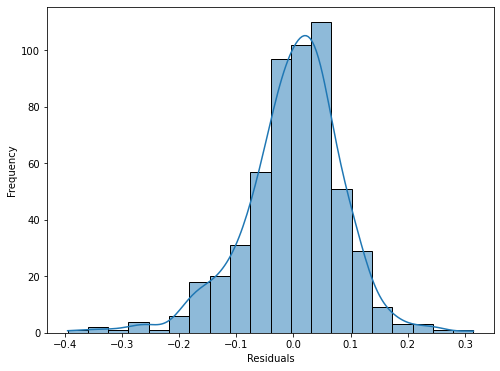

In [51]:
# Plotting a histogram of the residuals
figure = plt.figure(figsize = (8, 6))
sns.histplot(residual, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

As had been assumed, the error terms have a normal distribution and have a mean of approximately zero.

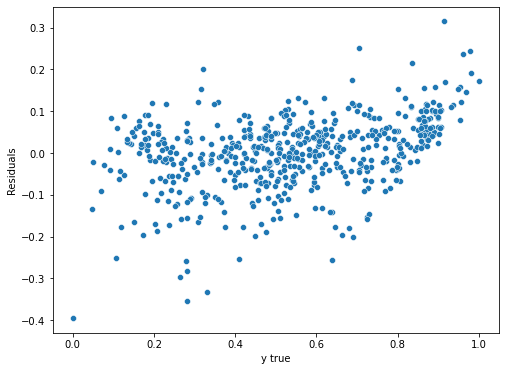

In [52]:
# Plotting a scatterplot of the residuals vs y_true values
figure = plt.figure(figsize = (8, 6))
sns.scatterplot(x=y_train, y=residual)
plt.xlabel('y true')
plt.ylabel('Residuals')
plt.show()

As had been assumed, the error terms have appear random and independent of each other.

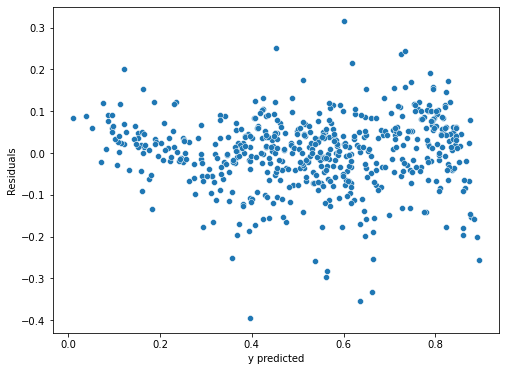

In [53]:
# Plotting a scatterplot of the residuals vs y_true values
figure = plt.figure(figsize = (8, 6))
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('y predicted')
plt.ylabel('Residuals')
plt.show()

As had been assumed, the error terms almost have a constant variance throughout, except for a few data points.

So our assumptions for Linear Regression were correct and have been validated in the above graphs.

## Making Predictions on the test set

### Keeping only the required features

The features which were dropped from the train set during feature selection need to be removed from the test set as well.

In [54]:
X_test

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy
557,1,0,1,0.804200,0.435475,0.217279,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
617,1,0,1,0.679816,0.402549,0.460193,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
622,1,0,0,0.708056,0.399894,0.435906,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
458,1,0,1,0.634823,0.359001,0.291496,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
558,1,0,1,0.822711,0.379713,0.074217,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,1,0,0,0.614541,0.355814,0.383253,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
22,0,0,0,0.027620,0.316863,0.433907,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
351,0,0,0,0.232633,0.507700,0.267199,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
316,0,0,0,0.491059,0.344662,0.510122,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov',
       'weekday_Mon', 'weekday_Wed', 'weathersit_Light_Rain_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [56]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test)

# Creating X_test_new by dropping variables from X_test
X_test_new = X_test_new[X_train_rfe.columns]

In [57]:
# Making predictions
y_test_pred = lr.predict(X_test_new)
y_test_pred

557    0.837292
617    0.729083
622    0.787386
458    0.770397
558    0.789956
         ...   
630    0.759301
22     0.033302
351    0.308109
316    0.364095
154    0.580353
Length: 183, dtype: float64

Text(0, 0.5, 'y_pred')

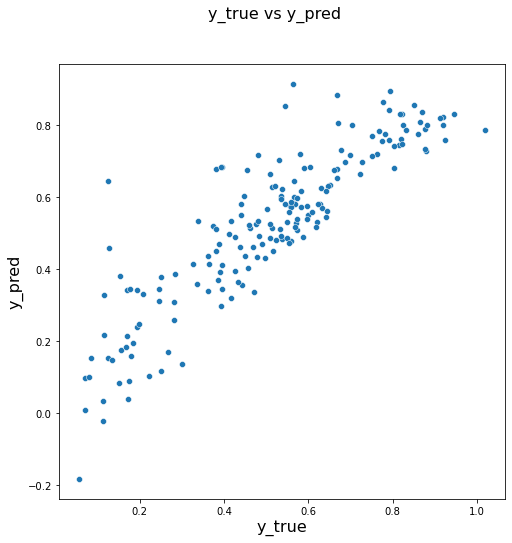

In [58]:
# Plotting y_test and y_test_pred to understand the spread and degree of correlation.
figure = plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_test_pred)
figure.suptitle('y_true vs y_pred', fontsize=16)
plt.xlabel('y_true', fontsize=16)
plt.ylabel('y_pred', fontsize=16)

## Model Evaluation

Let us now evaluate the model performance on the test data using different metrics available.

In [59]:
# The mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean squared error: {mse:.2f}")

# The root mean squared error
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse:.2f}")

# The coefficient of determination
r2 = r2_score(y_test, y_test_pred)
print(f"Coefficient of determination: {r2:.2f}")

# The adjusted R-squared value
n, p = X_test_new.shape
adj_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.2f}")

Mean squared error: 0.01
Root mean squared error: 0.11
Coefficient of determination: 0.76
Adjusted R-squared: 0.73


As we can see from the evaluation metrics, our model seems to be performing pretty good on the test data. With more data, or more statistically significant features, the performance can be further improved.